In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# import dataset
df=pd.read_csv('StudentsPerformance.csv')

### Data Understanding & Preparation

In [71]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [72]:
df_original=df.copy()

This project aims to analyze how demographic, social, and preparation-related factors affect students’ academic performance

In [73]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [74]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [75]:
df['gender'].isnull().sum()

0

In [76]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### This Dataset have zero null values. 
#### This dataset have 5 categorical columns and 3 numeric columns. 

In [ ]:
# rename column names : Cleaned and standardized column names 
df_renamed = df.rename(columns={'parental level of education': 'parental_level_of_education', 'math score': 'math_score', 'reading score': 'reading_score', 'writing score': 'writing_score', 'test preparation course': 'test_preparation_course'})
df_renamed.head()
df=df_renamed

In [79]:
# extract numerical columns and categorical columns
categorical_columns=[features for features in df.columns if df[features].dtype=="O"]
numerical_columns=[features for features in df.columns if df[features].dtype!="O"]


print("categorical_columns: ", categorical_columns)
print("numerical columns: ", numerical_columns)

categorical_columns:  ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
numerical columns:  ['math_score', 'reading_score', 'writing_score']


In [ ]:
# Created meaningful features (Total Score)
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']

In [82]:
df[df['total_score']>250]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
2,female,group B,master's degree,standard,none,90,95,93,278
6,female,group B,some college,standard,completed,88,95,92,275
16,male,group C,high school,standard,none,88,89,86,263
34,male,group E,some college,standard,none,97,87,82,266
38,female,group D,associate's degree,free/reduced,completed,75,90,88,253
...,...,...,...,...,...,...,...,...,...
962,female,group E,associate's degree,standard,none,100,100,100,300
970,female,group D,bachelor's degree,standard,none,89,100,100,289
979,female,group C,associate's degree,standard,none,91,95,94,280
983,female,group A,some college,standard,completed,78,87,91,256


## Who are these students?

In [83]:
male_high_performers=(df['total_score'] > 250) & (df['gender']=="male")
male_high_performers_count=male_high_performers.sum()
male_high_performers_count
# 46 high performers males 

46

In [84]:
# who are they
df[(df['total_score'] > 250) & (df['gender']=="male")]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
16,male,group C,high school,standard,none,88,89,86,263
34,male,group E,some college,standard,none,97,87,82,266
104,male,group C,some college,standard,completed,98,86,90,274
121,male,group B,associate's degree,standard,completed,91,89,92,272
130,male,group D,master's degree,standard,none,89,84,82,255
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293
171,male,group E,some high school,standard,none,94,88,78,260
214,male,group E,high school,standard,completed,87,91,81,259
233,male,group E,some high school,standard,none,92,87,78,257
286,male,group E,associate's degree,standard,completed,97,82,88,267


In [85]:
female_high_performers=(df['total_score'] > 250) & (df['gender']=="female")
female_high_performers_count=female_high_performers.sum()
female_high_performers_count
# 88 high performers females 

88

In [86]:
# who are they
df[(df['total_score'] > 250) & (df['gender']=="female")]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
2,female,group B,master's degree,standard,none,90,95,93,278
6,female,group B,some college,standard,completed,88,95,92,275
38,female,group D,associate's degree,free/reduced,completed,75,90,88,253
56,female,group E,associate's degree,standard,completed,82,85,86,253
94,female,group B,some college,standard,none,79,86,92,257
...,...,...,...,...,...,...,...,...,...
962,female,group E,associate's degree,standard,none,100,100,100,300
970,female,group D,bachelor's degree,standard,none,89,100,100,289
979,female,group C,associate's degree,standard,none,91,95,94,280
983,female,group A,some college,standard,completed,78,87,91,256


## so there are 46 male student who have marks higehr then 250 and 88 female student who have marks greater than 250

In [87]:
# Compare female vs male counts and proportions

total_high_performers=male_high_performers.sum()+female_high_performers.sum()
total_high_performers

134

In [88]:
# find percentage of high perfomers male and female 
male_high_performers_percentage=(male_high_performers_count/total_high_performers)*100
male_high_performers_percentage=round(male_high_performers_percentage,2)
print(male_high_performers_percentage)

34.33


In [89]:
female_high_performers_percentage=100-male_high_performers_percentage
print(female_high_performers_percentage)

65.67


Among high-performing students, 65.67% are female, while 34.33% are male, indicating a higher representation of female students in the top performance group.


🔸 Female-dominant

“Female students constitute a higher proportion of high performers compared to male students, suggesting stronger overall performance among females in the dataset.”


In [90]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [91]:
average_reading_score=df['reading_score'].sum()/len(df)
average_writing_score=df['writing_score'].sum()/len(df)
average_math_score=df['math_score'].sum()/len(df)

print("Average score of studnet in reading: ", average_reading_score)
print("Average score of student in writing: ", average_writing_score)
print("Average score of studnet in math: ", average_math_score)

Average score of studnet in reading:  69.169
Average score of student in writing:  68.054
Average score of studnet in math:  66.089


### “Subject-wise performance analysis shows that reading has the highest average score (69.17), followed by writing (68.05), while mathematics records the lowest average score (66.09). This indicates that students exhibit stronger performance in language-based subjects, whereas mathematics remains the weakest area, highlighting the need for targeted academic intervention in mathematics.”

# EDA

### Gender-wise Performance

In [92]:
# now let we do Gender-wise Performance Analysis
# find total average score for male students 
male_high_performers=df[(df['total_score'] > 250) & (df['gender']=='male')]
average_male_high_perfomer_score=male_high_performers['total_score'].sum()/len(male_high_performers)
average_male_high_perfomer_score=round(average_male_high_perfomer_score, 2)
average_male_high_perfomer_score

266.04

In [93]:
# find total average score for female students 
female_high_performers=df[(df['total_score'] > 250) & (df['gender']=='female')]
average_female_high_perfomer_score=female_high_performers['total_score'].sum()/len(female_high_performers)
average_female_high_perfomer_score=round(average_female_high_perfomer_score, 2)
average_female_high_perfomer_score

270.18

Female high-performing students demonstrate a marginally higher average total score than male high performers, indicating slightly stronger overall academic performance among females at the top achievement level.

“Gender-wise analysis of high-performing students reveals that female students achieved an average total score of 270, compared to 266.04 for male students. Although the difference is modest, it suggests that female high performers exhibit slightly higher overall academic achievement.

### Compare Subject-wise Performance

In [94]:
avg_math_male=male_high_performers['math_score'].sum()/len(male_high_performers)
avg_math_male=round(avg_math_male,2)
avg_math_male

91.7

In [95]:
avg_math_female=female_high_performers['math_score'].sum()/len(female_high_performers)
avg_math_female=round(avg_math_female, 2)
avg_math_female

85.32

### Among high-performing students, male students outperform female students in mathematics, achieving a higher average math score.

In [96]:
avg_reading_female=female_high_performers['reading_score'].sum()/len(female_high_performers)
avg_reading_female=round(avg_reading_female, 2)
avg_reading_female

92.3

In [97]:
avg_reading_male=male_high_performers['reading_score'].sum()/len(male_high_performers)
avg_reading_male=round(avg_reading_male,2)
avg_reading_male

88.04

### Among high-performing students, female students outperform male students in reading, achieving a higher average reading score.

In [98]:
avg_writing_female=female_high_performers['writing_score'].sum()/len(female_high_performers)
avg_writing_female=round(avg_writing_female, 2)
avg_writing_female

92.57

In [99]:
avg_writing_male=male_high_performers['writing_score'].sum()/len(male_high_performers)
avg_writing_male=round(avg_writing_male,2)
avg_writing_male

86.3

## Female students outperform male students in reading and writing, while male students outperform female students in mathematics.

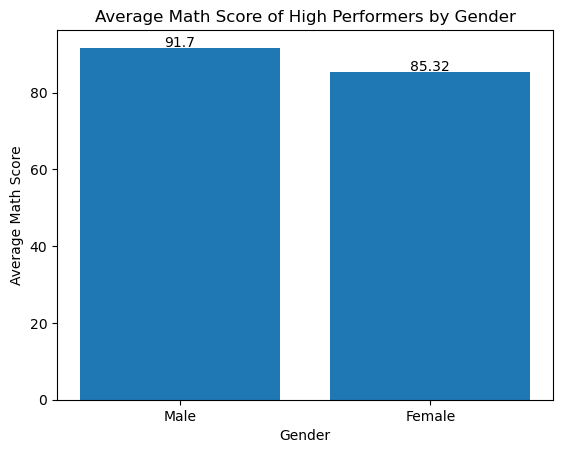

In [100]:
genders = ['Male', 'Female']
avg_math_scores = [91.7, 85.32]

plt.bar(genders, avg_math_scores)
plt.title('Average Math Score of High Performers by Gender')
plt.ylabel('Average Math Score')
plt.xlabel('Gender')

# Optional: show exact values on bars
for i, score in enumerate(avg_math_scores):
    plt.text(i, score + 0.3, f'{score}', ha='center')

plt.show()


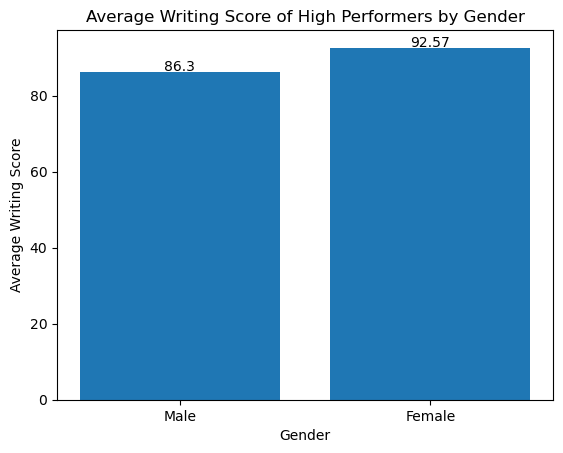

In [101]:
genders = ['Male', 'Female']
avg_writing_scores = [avg_writing_male,  avg_writing_female]

plt.bar(genders, avg_writing_scores)
plt.title('Average Writing Score of High Performers by Gender')
plt.ylabel('Average Writing Score')
plt.xlabel('Gender')

# Optional: show exact values on bars
for i, score in enumerate(avg_writing_scores):
    plt.text(i, score + 0.3, f'{score}', ha='center')

plt.show()


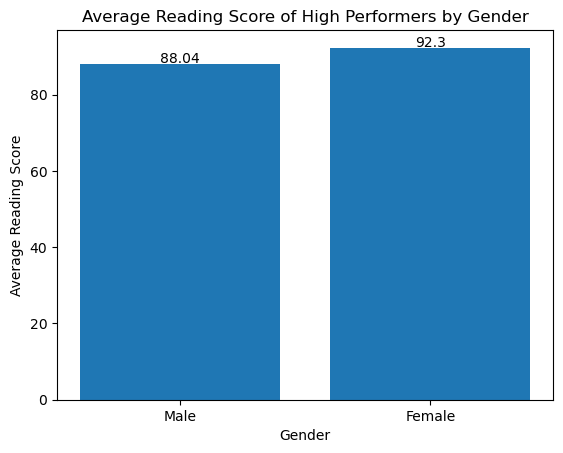

In [102]:
genders = ['Male', 'Female']
avg_reading_scores = [avg_reading_male, avg_reading_female]

plt.bar(genders, avg_reading_scores)
plt.title('Average Reading Score of High Performers by Gender')
plt.ylabel('Average Reading Score')
plt.xlabel('Gender')

# Optional: show exact values on bars
for i, score in enumerate(avg_reading_scores):
    plt.text(i, score + 0.3, f'{score}', ha='center')

plt.show()


The plt.text() function in Matplotlib is used to display text at a specific position on a plot. In this code, plt.text(i, score + 0.3, f'{score}', ha='center') places the numerical value of the average reading score above each bar in the bar chart. The x-coordinate i corresponds to the index of the bar, ensuring the text is aligned horizontally with the correct gender category, while the y-coordinate score + 0.3 positions the text slightly above the top of the bar to avoid overlapping. The expression f'{score}' converts the numerical score into a string so it can be displayed as text, and the parameter ha='center' horizontally centers the value above the bar. This improves the readability and interpretability of the chart by allowing viewers to see the exact values represented by each bar.

The enumerate() function in Python is used to iterate over a sequence while simultaneously keeping track of both the index and the corresponding value of each element. Instead of looping through the list elements alone, enumerate() returns pairs of (index, value) during each iteration. In this code, it is applied to the list avg_reading_scores, where the index i represents the position of each bar on the x-axis of the bar chart and the variable score represents the height of the corresponding bar. This mapping allows the program to correctly position the numerical value above each bar using its index while accessing the actual data value. The use of enumerate() makes the code more readable, efficient, and less error-prone compared to manually managing index counters.

### Impact of Test Preparation

In [104]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [105]:
df[df['test_preparation_course']=='none']

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
5,female,group B,associate's degree,standard,none,71,83,78,232
...,...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76,207
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,208
994,male,group A,high school,standard,none,63,63,62,188
996,male,group C,high school,free/reduced,none,62,55,55,172


In [106]:
completed_test=df[df['test_preparation_course']!='none']

In [107]:
# performance of student who completed test preparation course
completed_test_mean=completed_test['total_score'].mean()
completed_test_mean

218.00837988826817

In [108]:
# performance of student who didn't completed test preparation course
uncompleted_test=df[df['test_preparation_course']=='none']
uncompleted_test_mean=uncompleted_test['total_score'].mean()
uncompleted_test_mean

195.11682242990653

### Test preparation has a positive impact on academic performance, with students who completed the preparation course performing better overall.

### Influence of Parental Education

In [109]:
# record extraction based on parental education 
bachelor=df[df['parental_level_of_education']=="bachelor's degree"]
some_clg=df[df['parental_level_of_education']=="some college"]
master=df[df['parental_level_of_education']=="master's degree"]
associate=df[df['parental_level_of_education']=="associate's degree"]
high_school=df[df['parental_level_of_education']=="high school"]
some_high_school=df[df['parental_level_of_education']=="some high school"]

In [110]:
avg_bachelor=bachelor['total_score'].mean()
print(avg_bachelor)

avg_some_clg=some_clg['total_score'].mean()
print(avg_some_clg)

master_avg=master['total_score'].mean()
print(master_avg)

associate_avg=associate['total_score'].mean()
print(associate_avg)

high_school_avg=high_school['total_score'].mean()
print(high_school_avg)

some_high_school_avg=some_high_school['total_score'].mean()
print(some_high_school_avg)

215.77118644067798
205.42920353982302
220.79661016949152
208.7072072072072
189.2908163265306
195.3240223463687


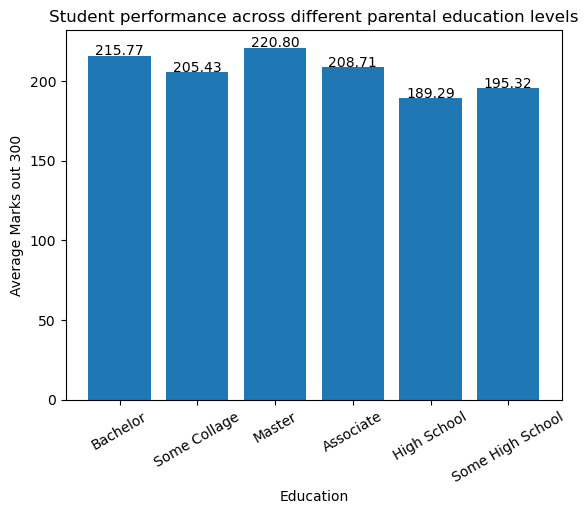

In [ ]:
# Names on X axis
edu=['Bachelor', 'Some Collage', 'Master', 'Associate', 'High School', 'Some High School']

# values on bar
parental_edu = [avg_bachelor, avg_some_clg, master_avg, associate_avg, high_school_avg, some_high_school_avg]

plt.bar(edu, parental_edu)
plt.title('Student performance across different parental education levels')
plt.ylabel('Average Marks out 300')
plt.xlabel('Education')
plt.xticks(rotation=30)   # clear and professional


for i, score in enumerate(parental_edu):
    plt.text(i, score+0.4, f'{score:.2f}', ha='center')    


####  Higher parental education levels are associated with improved student academic performance, suggesting the influence of a supportive academic environment at home.

### Effect of Lunch Type

In [118]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [119]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [130]:
# extract rows based on lunch type
standard=df[df['lunch']=='standard']
free=df[df['lunch']=='free/reduced']

In [126]:
standard_lunch_total_score_mean=standard['total_score'].mean()
standard_lunch_total_score_mean

212.51162790697674

In [131]:
free_lunch_total_score_mean=free['total_score'].mean()
free_lunch_total_score_mean

186.59718309859156

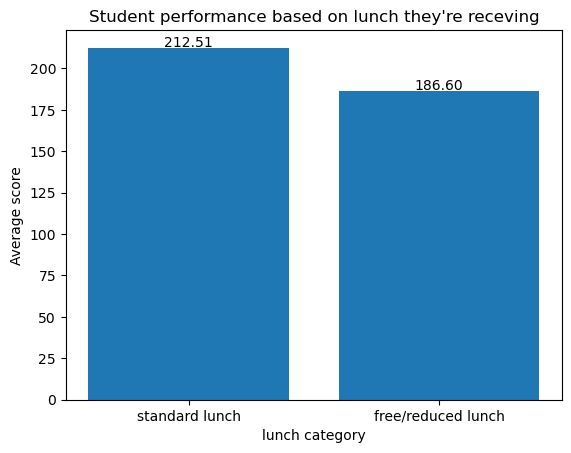

In [134]:
# bar names on x
names=['standard lunch', 'free/reduced lunch']
# values on bar
scores=[standard_lunch_total_score_mean, free_lunch_total_score_mean]

plt.bar(names, scores)
plt.title("Student performance based on lunch they're receving")
plt.xlabel('lunch category')
plt.ylabel('Average score')

# to print actual values above the bars
for i, score in enumerate(scores):
    plt.text(i, score+0.4, f'{score:.2f}', ha='center')

### Lunch type, which reflects socioeconomic status, is related to academic performance, with students receiving standard lunch showing better outcomes

#### This analysis explored factors influencing student academic performance using demographic, preparation-related, and socioeconomic variables. The results indicate that gender-based differences exist at the subject level, test preparation positively affects performance, parental education plays a significant role, and socioeconomic factors such as lunch type are associated with academic outcomes. Language-based subjects emerged as strengths, while mathematics was identified as the primary area of difficulty

#### Future work may include incorporating attendance data, socioeconomic indicators, and psychological factors to deepen the analysis. Predictive models could also be developed to estimate student performance based on these features.